In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import(
     accuracy_score,
     classification_report,
     confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (7, 5)
sns.set(style="whitegrid")

In [16]:
df = pd.read_csv("Pima-Indians-Diabetes.csv", header=None)

df.columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()

Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
target_col = 'Outcome'

X = df.drop(target_col, axis=1)
y = df[target_col]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 614
Test size: 154


In [27]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled train shape:", X_train.shape)
print("Scaled test shape:", X_test.shape)

Scaled train shape: (614, 8)
Scaled test shape: (154, 8)


In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42)
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7143
Random Forest Accuracy: 0.7597
SVM (RBF Kernel) Accuracy: 0.7532


In [32]:
acc_df = pd.DataFrame.from_dict(
    accuracy_results,
    orient='index',
    columns=['Accuracy']
).sort_values(by='Accuracy', ascending=False)

acc_df

,Accuracy
Random Forest,0.759740
SVM (RBF Kernel),0.753247
Logistic Regression,0.714286


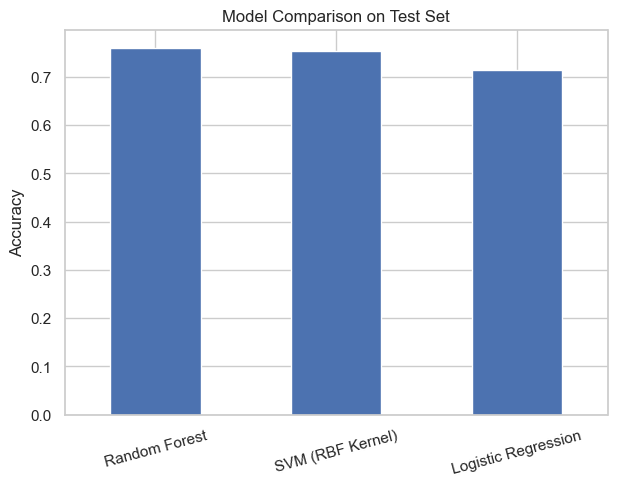

In [33]:
acc_df.plot(kind='bar', legend=False)
plt.ylabel("Accuracy")
plt.title("Model Comparison on Test Set")
plt.xticks(rotation=15)
plt.show()

In [35]:
best_model = LogisticRegression(max_iter=1000, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



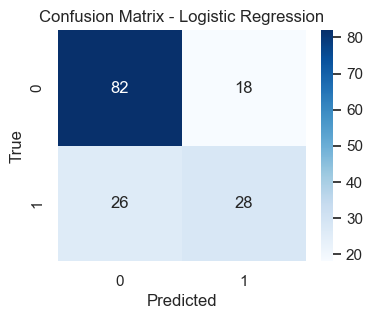

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print("Test accuracy (Best RF):", accuracy_score(y_test, y_pred_rf))

Best params: {'max_depth': 7, 'n_estimators': 100}
Best CV accuracy: 0.7752898840463814
Test accuracy (Best RF): 0.7207792207792207
